<a href="https://colab.research.google.com/github/gerardfp/datamarc/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from google.colab import auth
from collections import Counter
import gspread
from gspread_dataframe import set_with_dataframe
from oauth2client.client import GoogleCredentials
from google.colab import drive

%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

auth.authenticate_user()
drive.mount('drive')

gc = gspread.authorize(GoogleCredentials.get_application_default())
worksheet = gc.open('datamarc').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows)
df.columns = df.iloc[0]
df = df.iloc[1:]

for i in range(4, len(df.columns)):
  df[df.columns[i]] = df[df.columns[i]].astype('float')

colors = ['#1f77b4', '#d62728','#2ca02c','#ff7f0e','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [52]:
from pydoc import describe
df.describe()

0      COMPROMISO  MOTIVACION  APRENDIZAJE  COMUNICACION  PARTICIPACIÓN  \
count  24.000000   24.000000   24.000000    24.000000     24.000000       
mean   3.708750    3.457083    3.012917     3.541250      2.889583        
std    0.576257    0.721692    0.745762     0.927321      0.727010        
min    2.330000    2.330000    2.000000     2.000000      1.670000        
25%    3.330000    3.000000    2.330000     2.670000      2.330000        
50%    3.670000    3.330000    3.000000     3.500000      2.835000        
75%    4.000000    4.000000    3.330000     4.330000      3.670000        
max    5.000000    5.000000    5.000000     5.000000      4.330000        

0      SEGURIDAD  COMPENSACION  BIENESTAR     GENERO       RRLL  
count  24.000000  24.000000     24.000000  24.000000  24.000000  
mean   3.666667   2.652917      3.895833   3.747500   3.569167   
std    0.912134   0.770660      0.932262   0.706499   0.971050   
min    2.330000   1.330000      2.000000   2.480000   1.330000   
25%    3.000000   2.330000      3.000000   3.177500   2.917500   
50%    3.330000   2.670000      4.000000   3.880000   3.670000   
75%    4.670000   3.000000      4.625000   4.225000   4.330000   
max    5.000000   5.000000      5.000000   5.000000   5.000000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


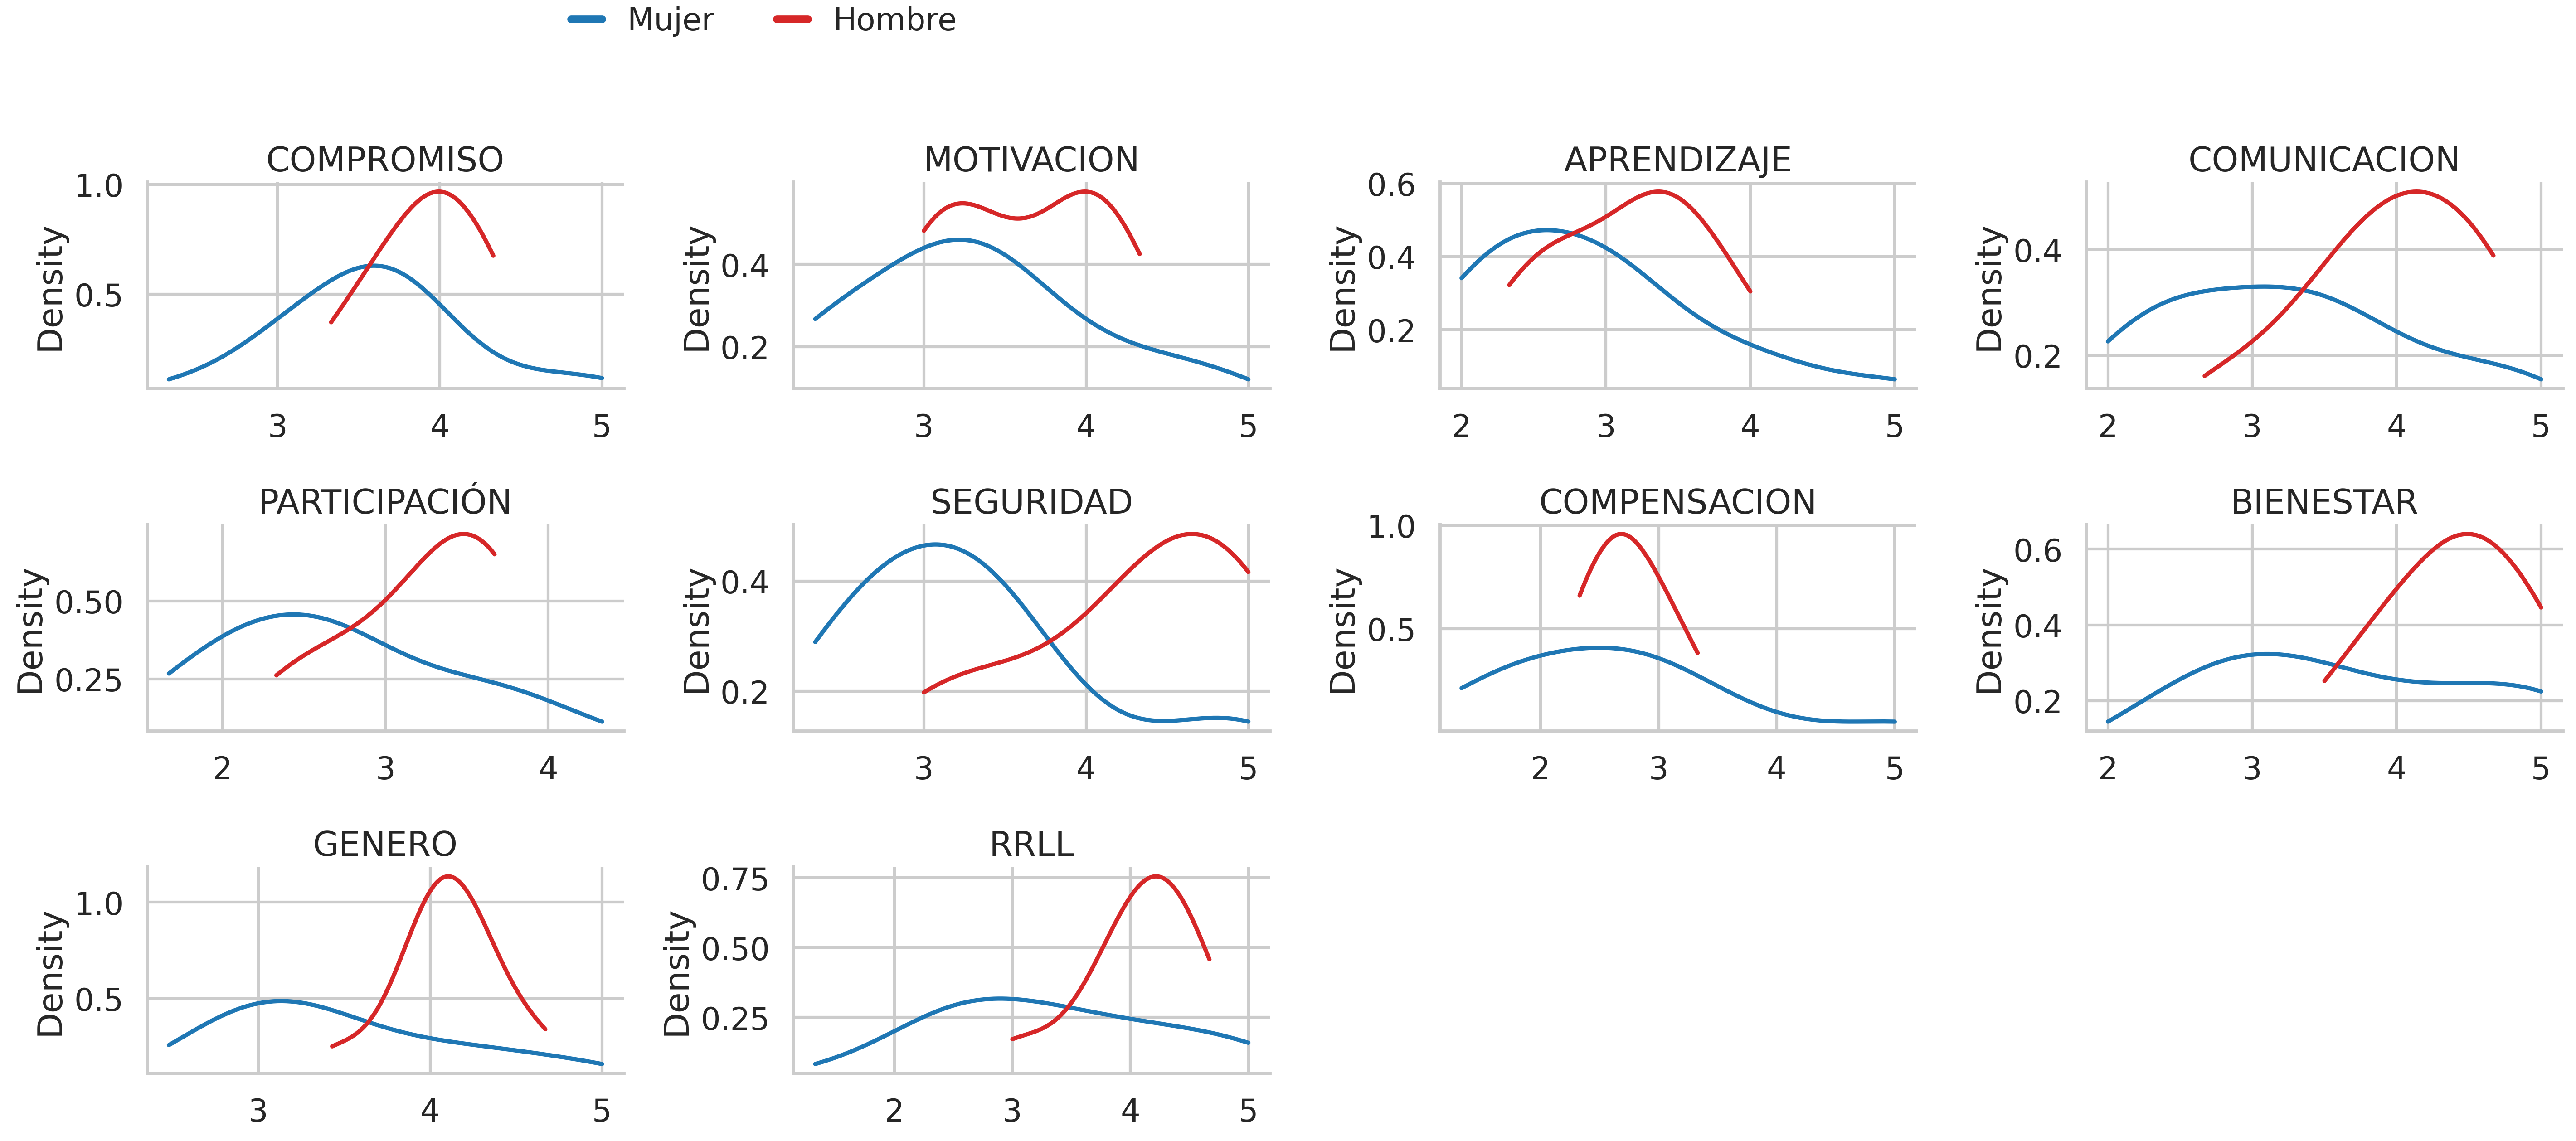

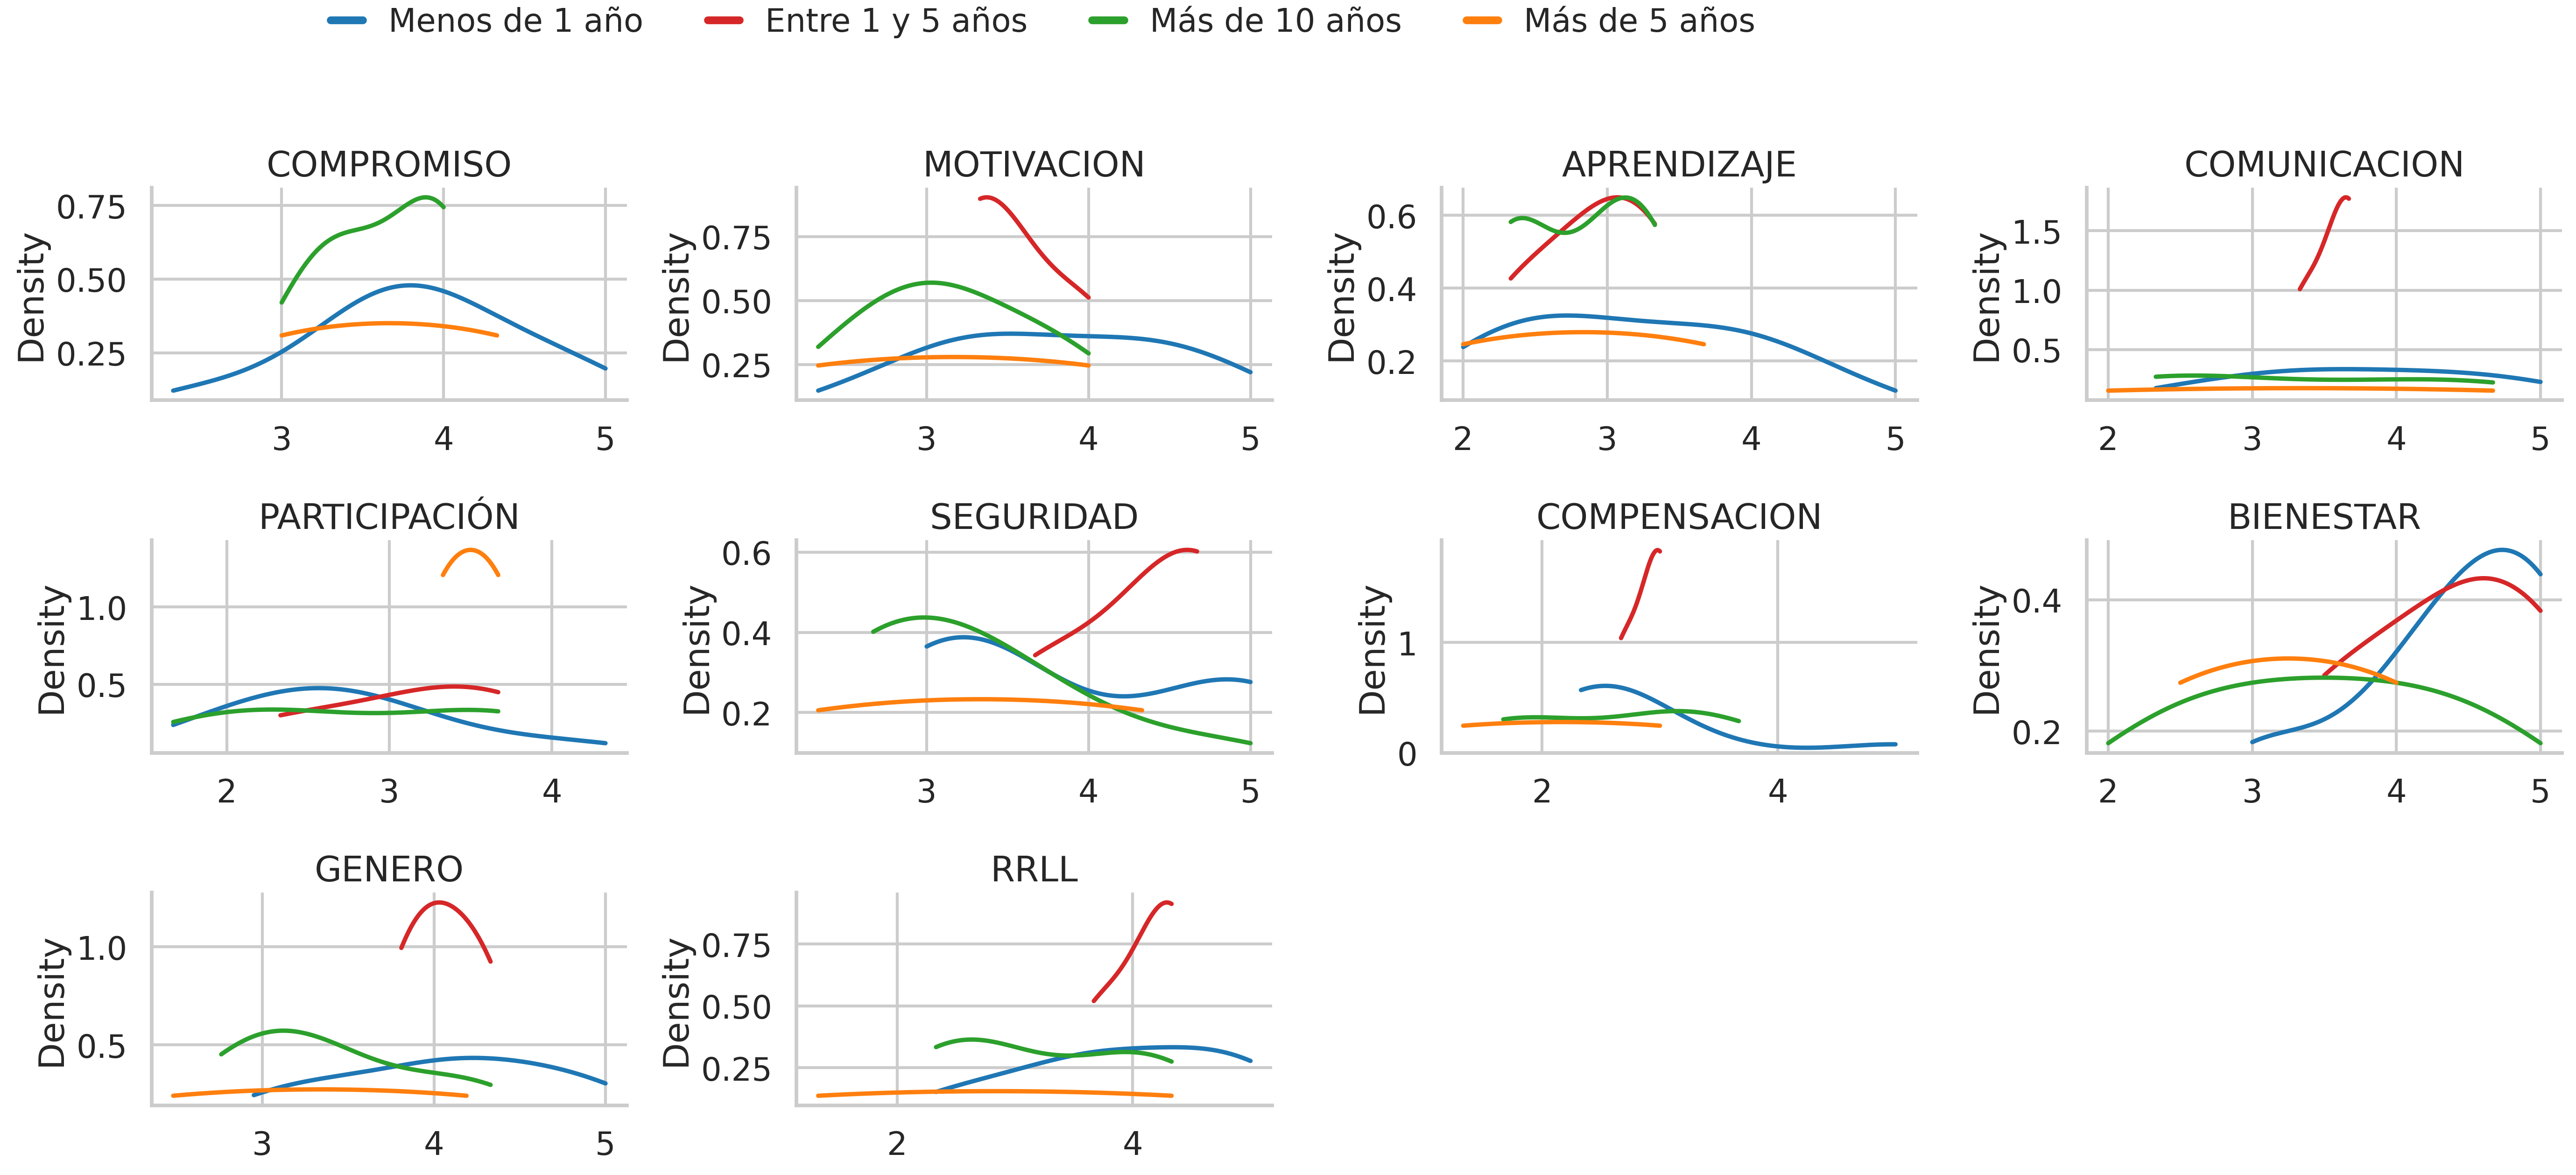

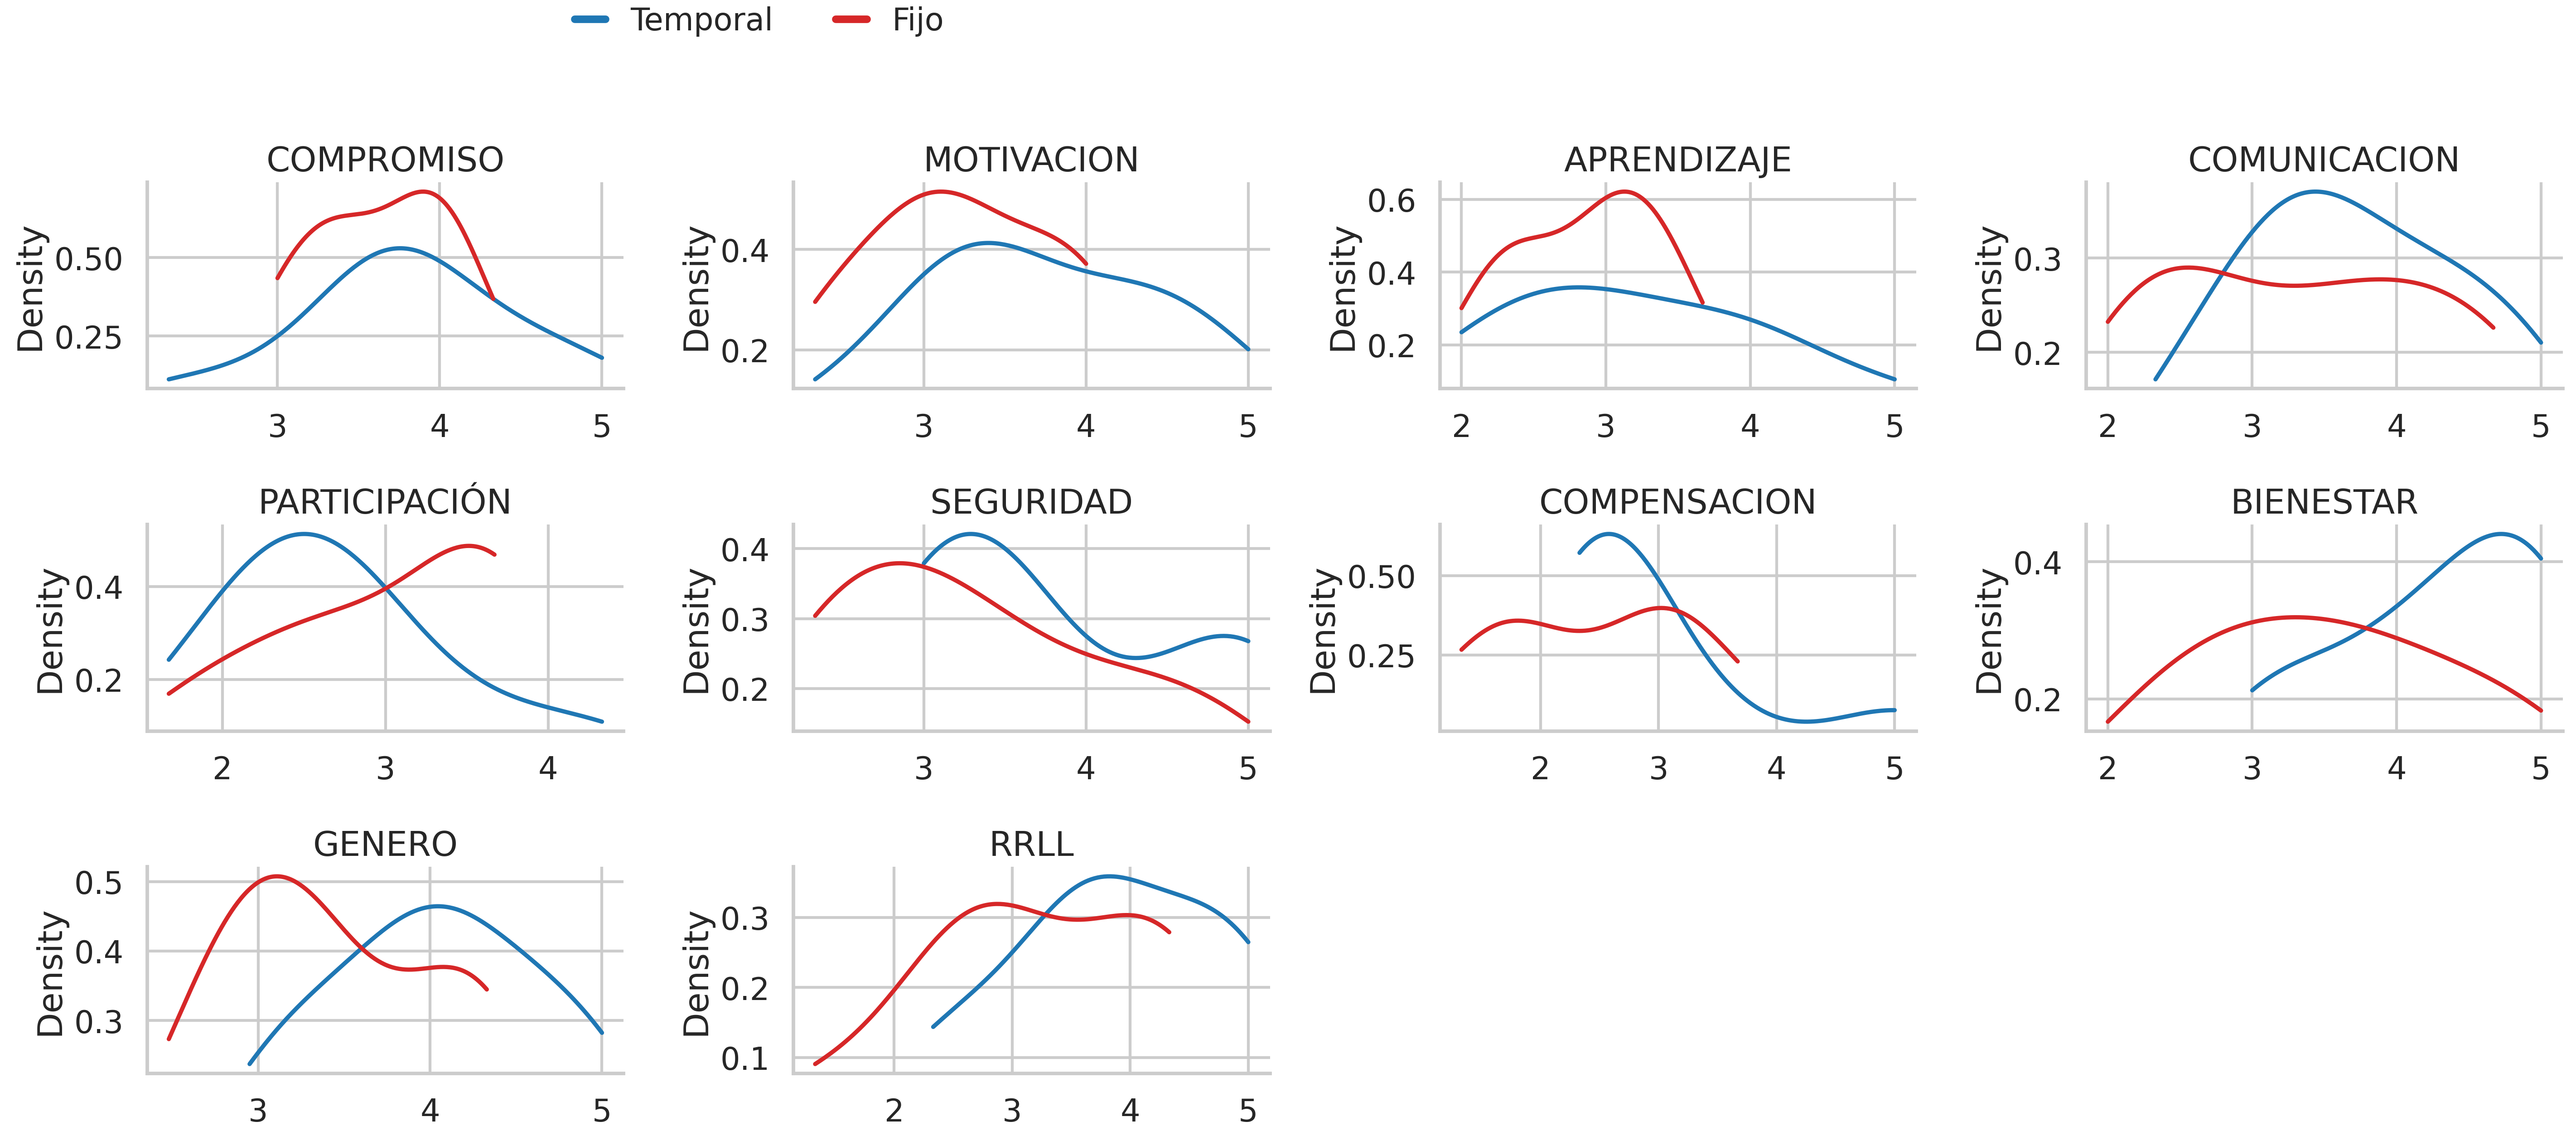

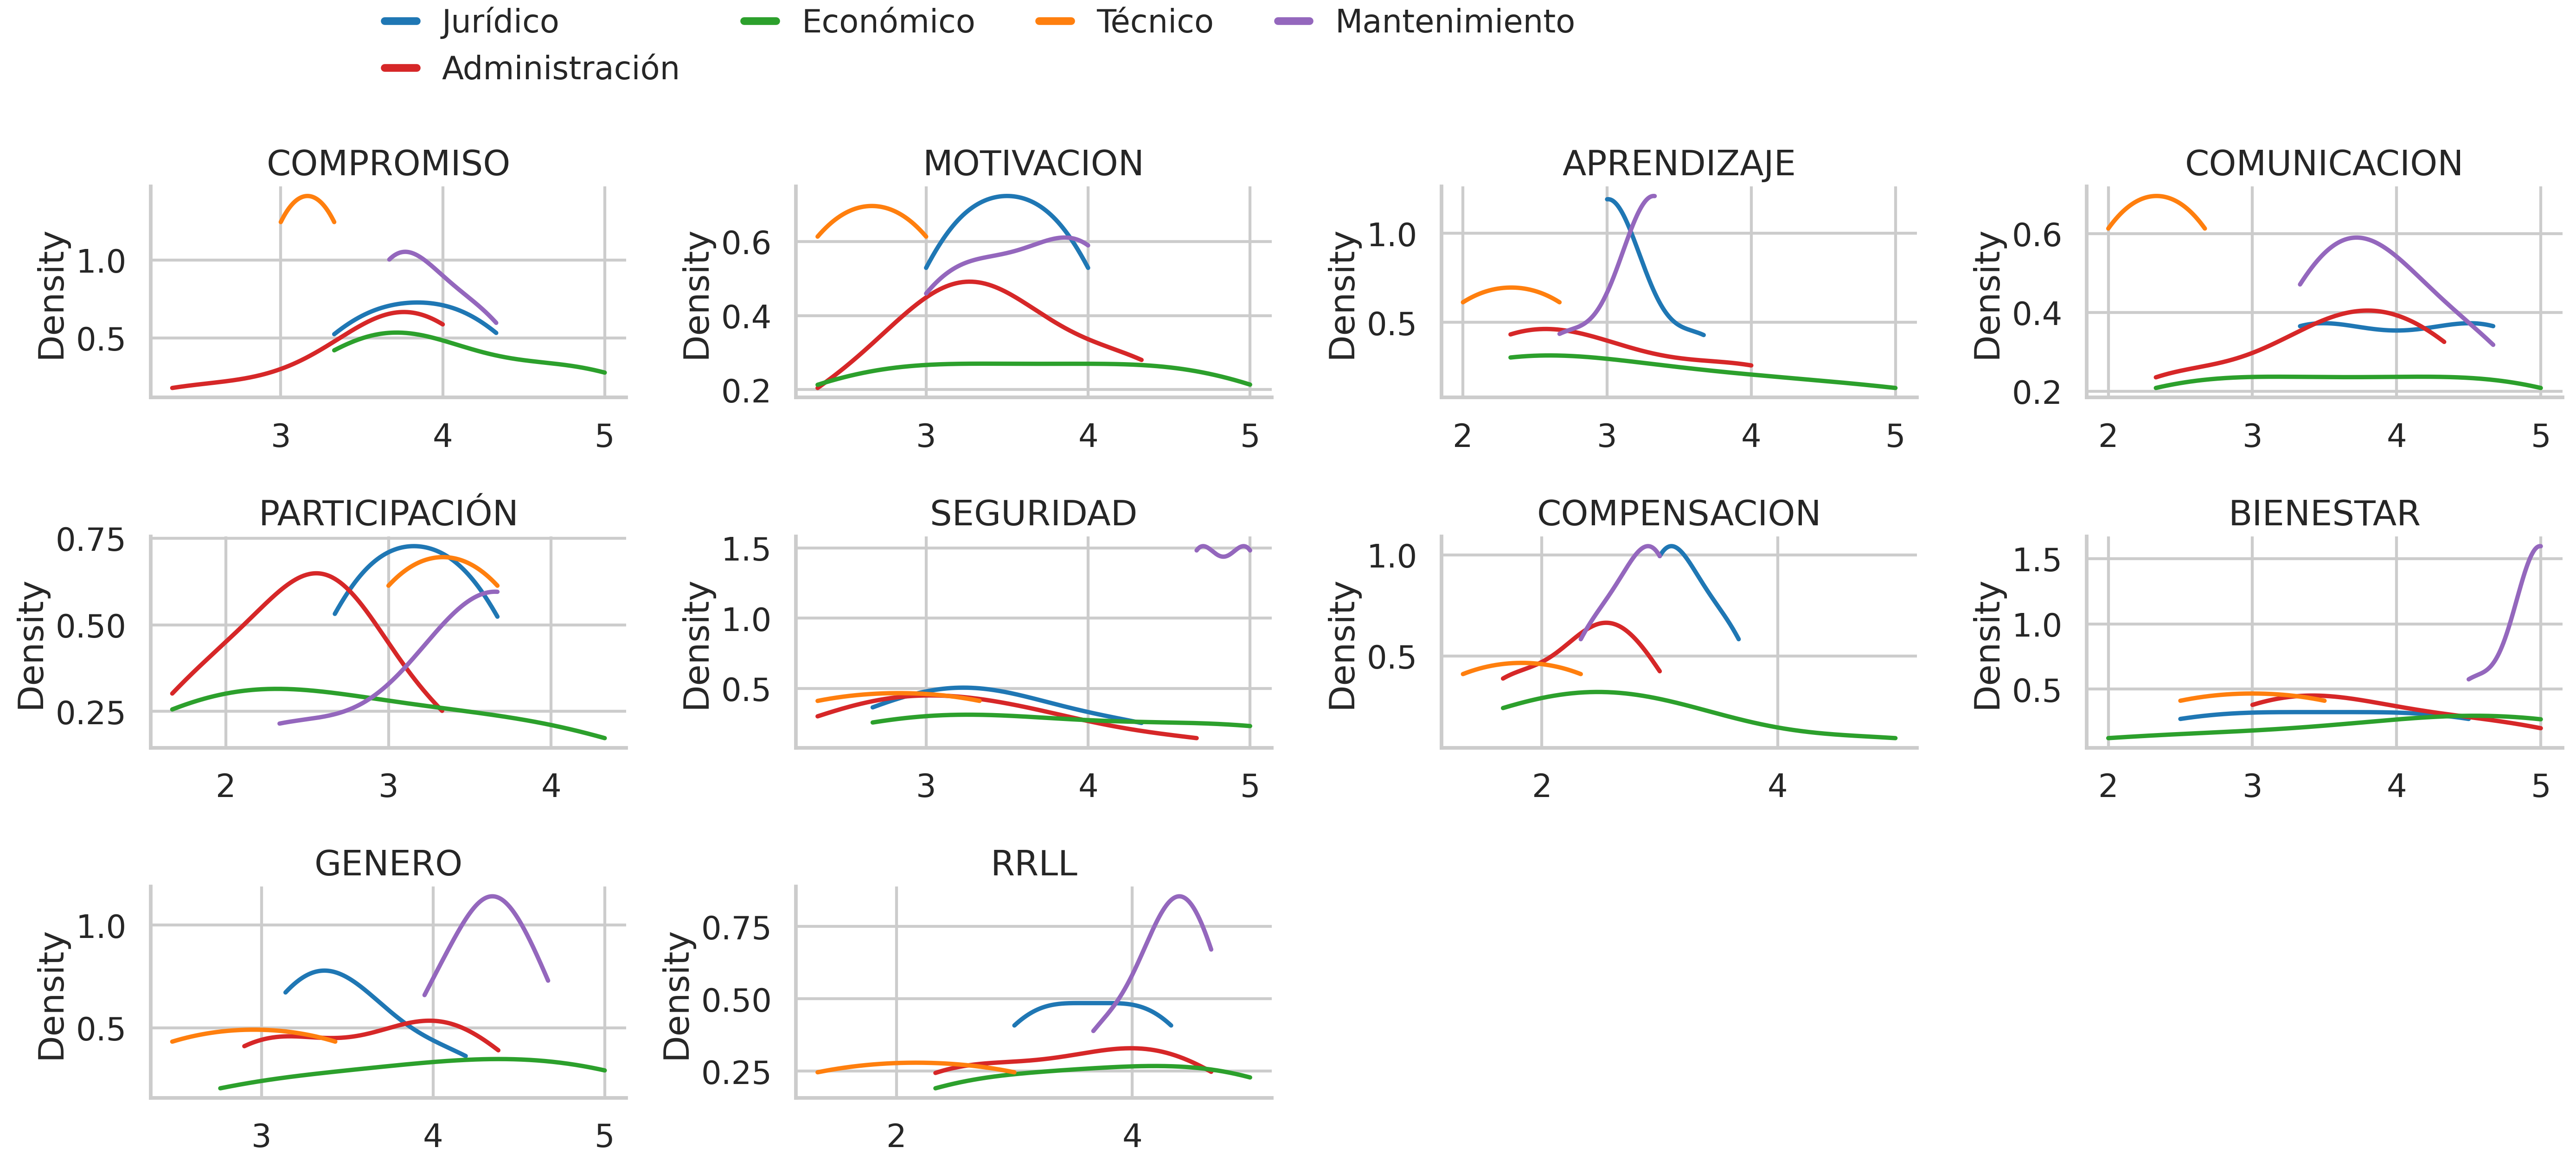

In [53]:
from textwrap import fill

def make_pair(cat,  bboxy=1.1, ncol=4, bboxx=0.25, col_wrap=4, height=2.7, aspect=1.8):

  sns.set_theme(style="whitegrid")
  sns.set_context("talk")
  sns.set_palette(sns.color_palette(colors))

  data = pd.melt(df,id_vars=cat, value_vars=df.columns[4:])
  data.rename(columns={data.columns[1]: "variable", "value":"valor"}, inplace=True)
  data = data.drop(data[data[cat] == 'Otro'].index)

  #display(data)

  g = sns.FacetGrid(data, col=data.columns[1], hue=data.columns[0], col_wrap=col_wrap, sharex=False, sharey=False, aspect=aspect, height=height)
  g.map(sns.kdeplot, "valor",  cut=0)
  g.add_legend(loc='upper center',  ncol=ncol, bbox_to_anchor=(bboxx, bboxy), frameon=False,handlelength=1)
  for text in g.legend.get_texts():
    text.set_text(fill(text.get_text(), 20))
  for legobj in g.legend.get_lines():
    legobj.set_linewidth(4)

  g.set_xlabels("")
  g.fig.set_dpi(150)
  g.set_titles("{col_name}")

make_pair('SEXO')
make_pair('ANTIGÜEDAD')
make_pair('CONTRATO')
make_pair('DEPARTAMENTO')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


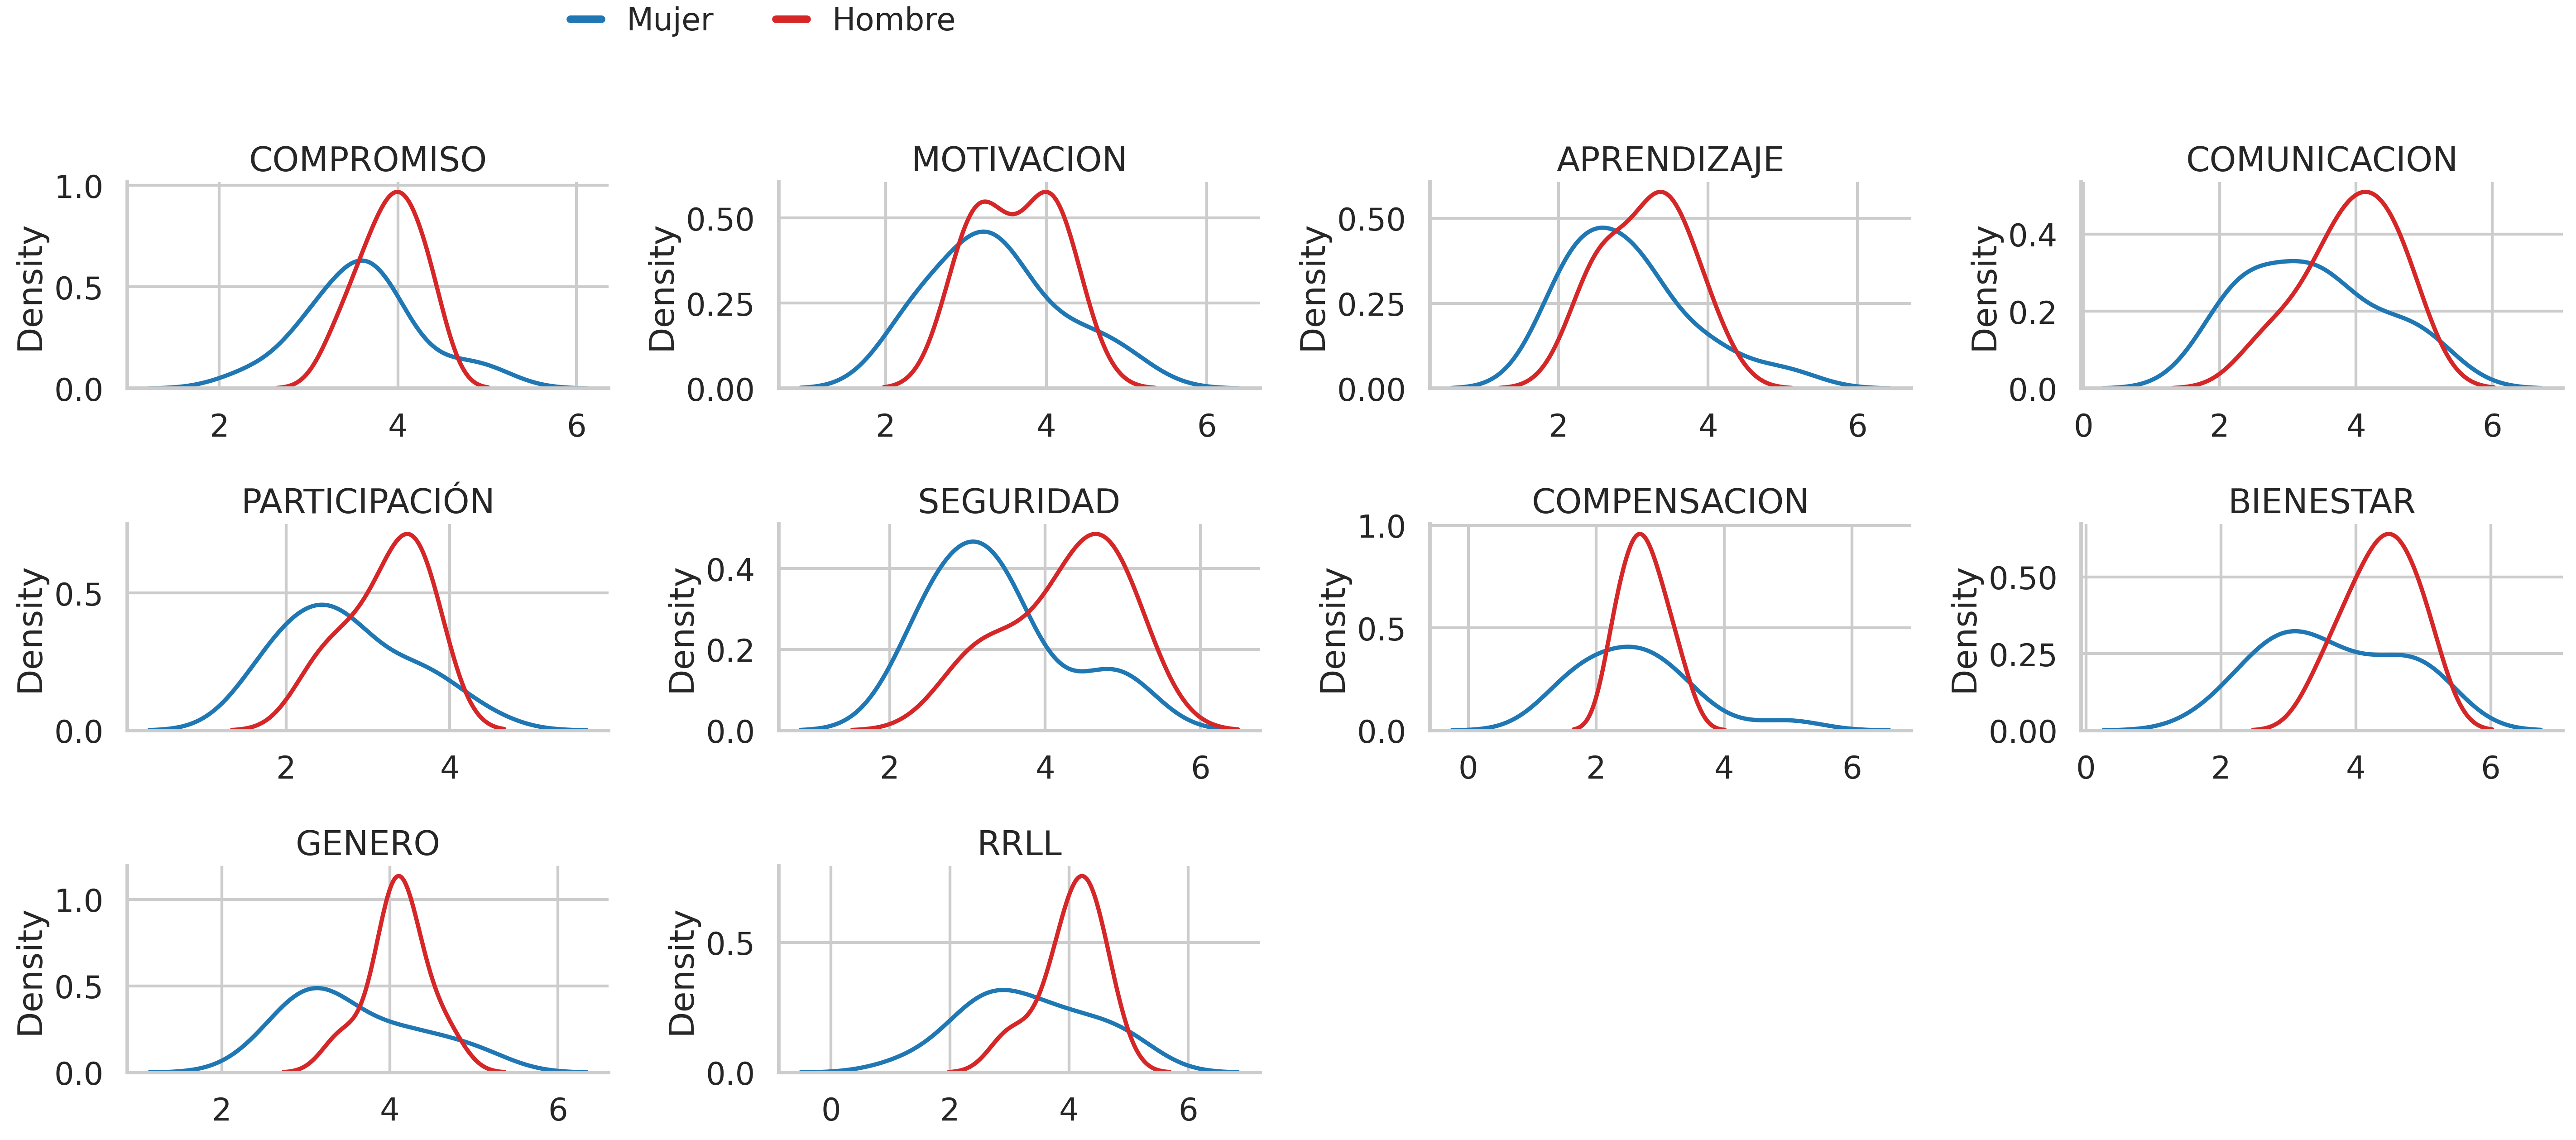

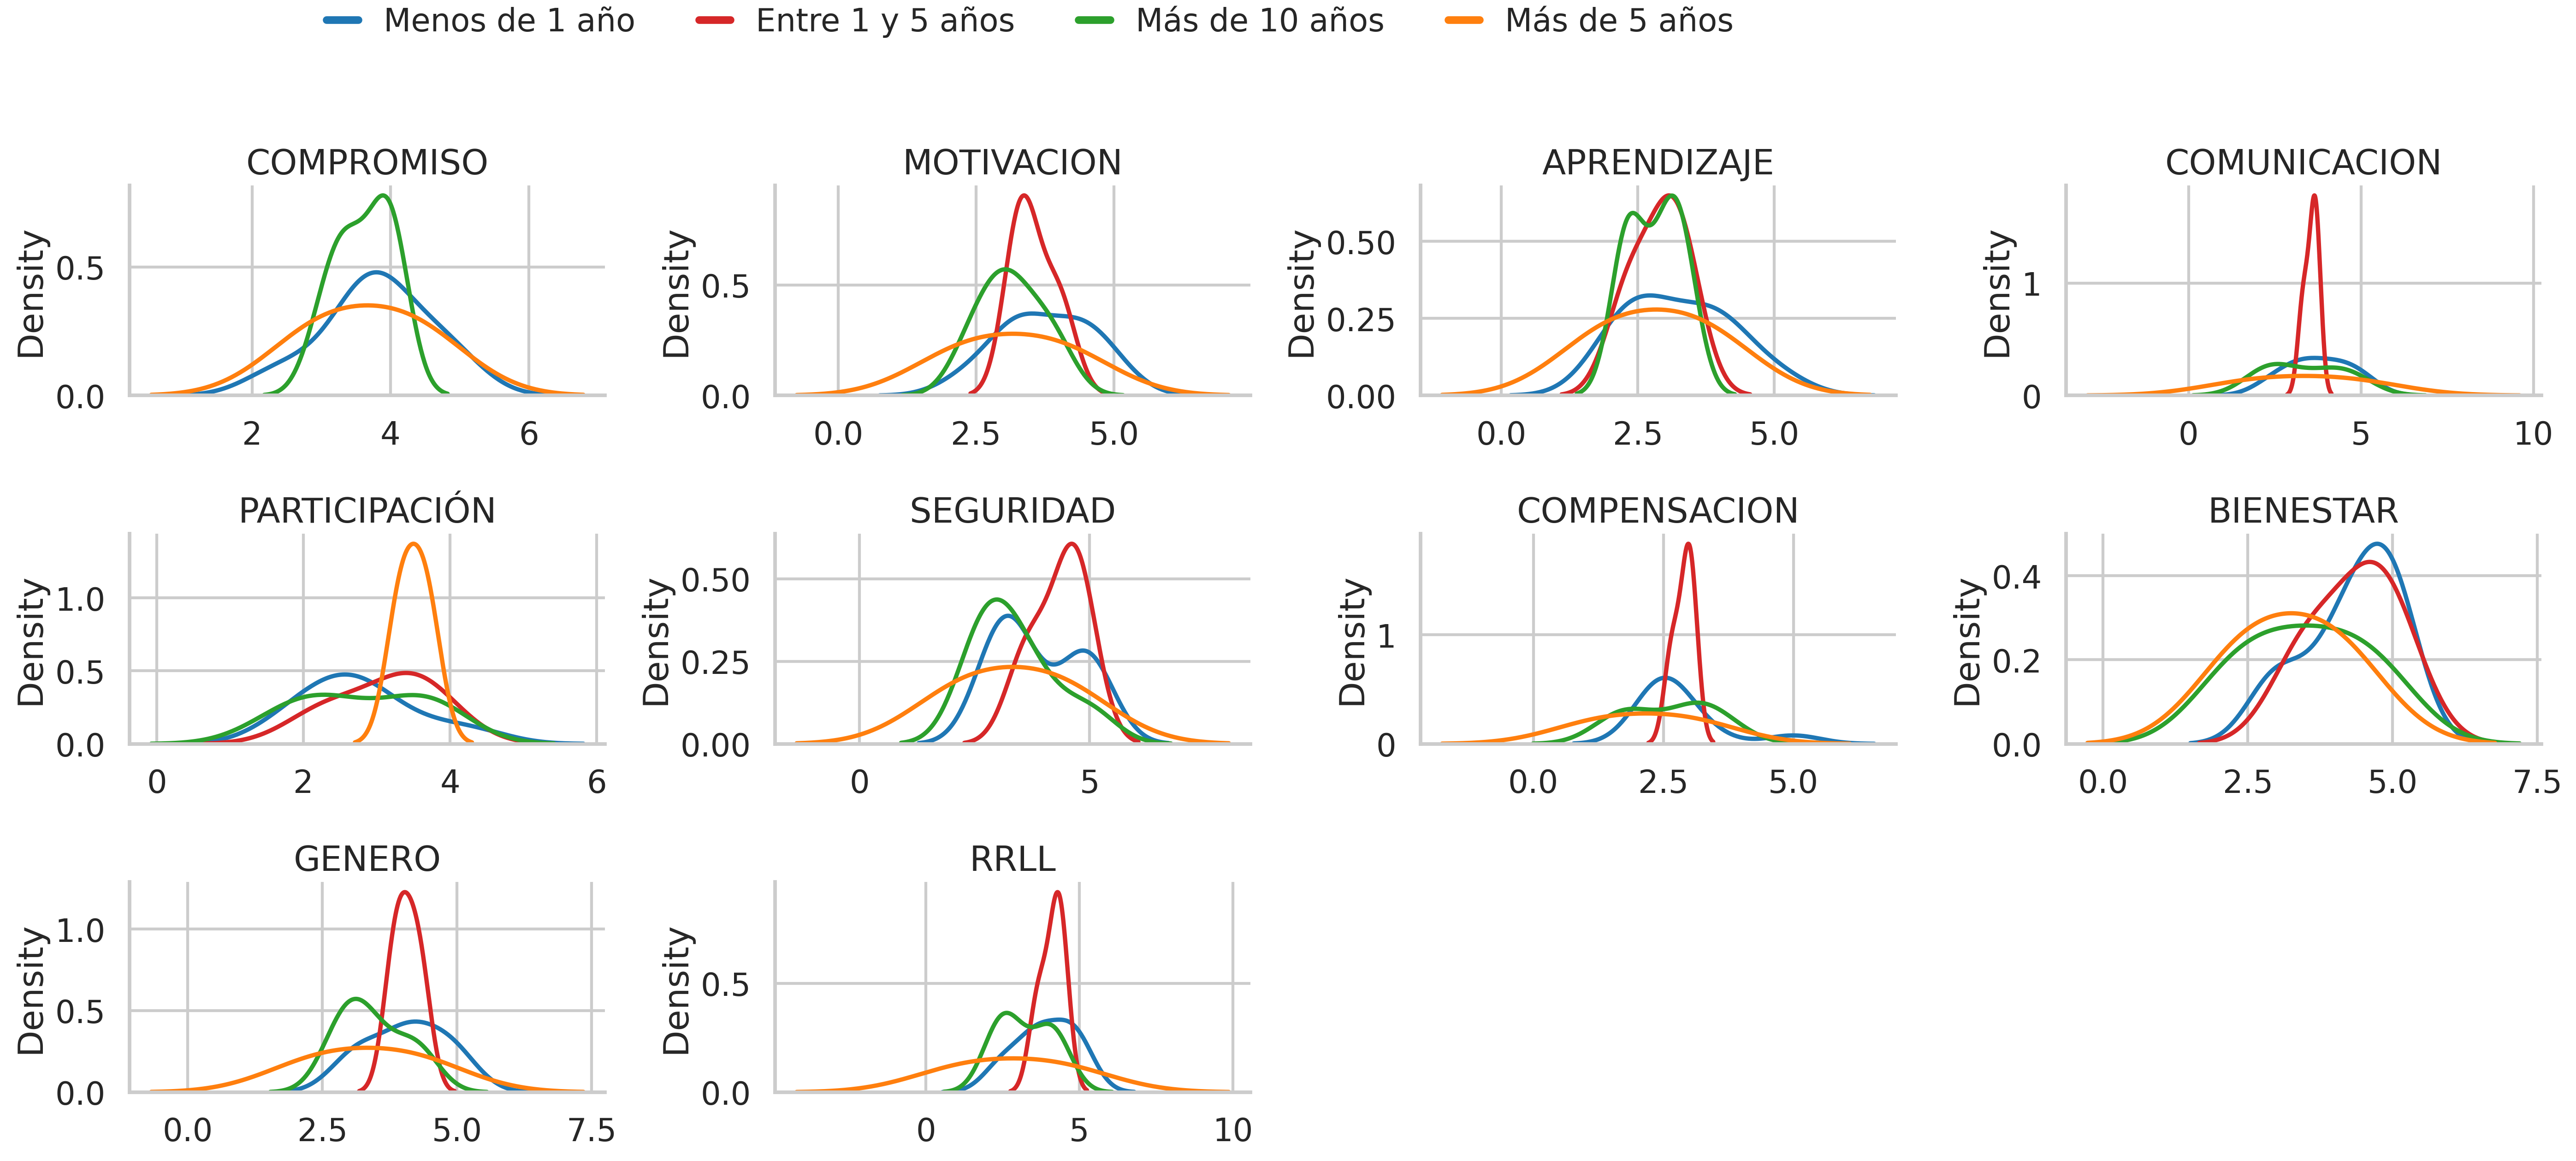

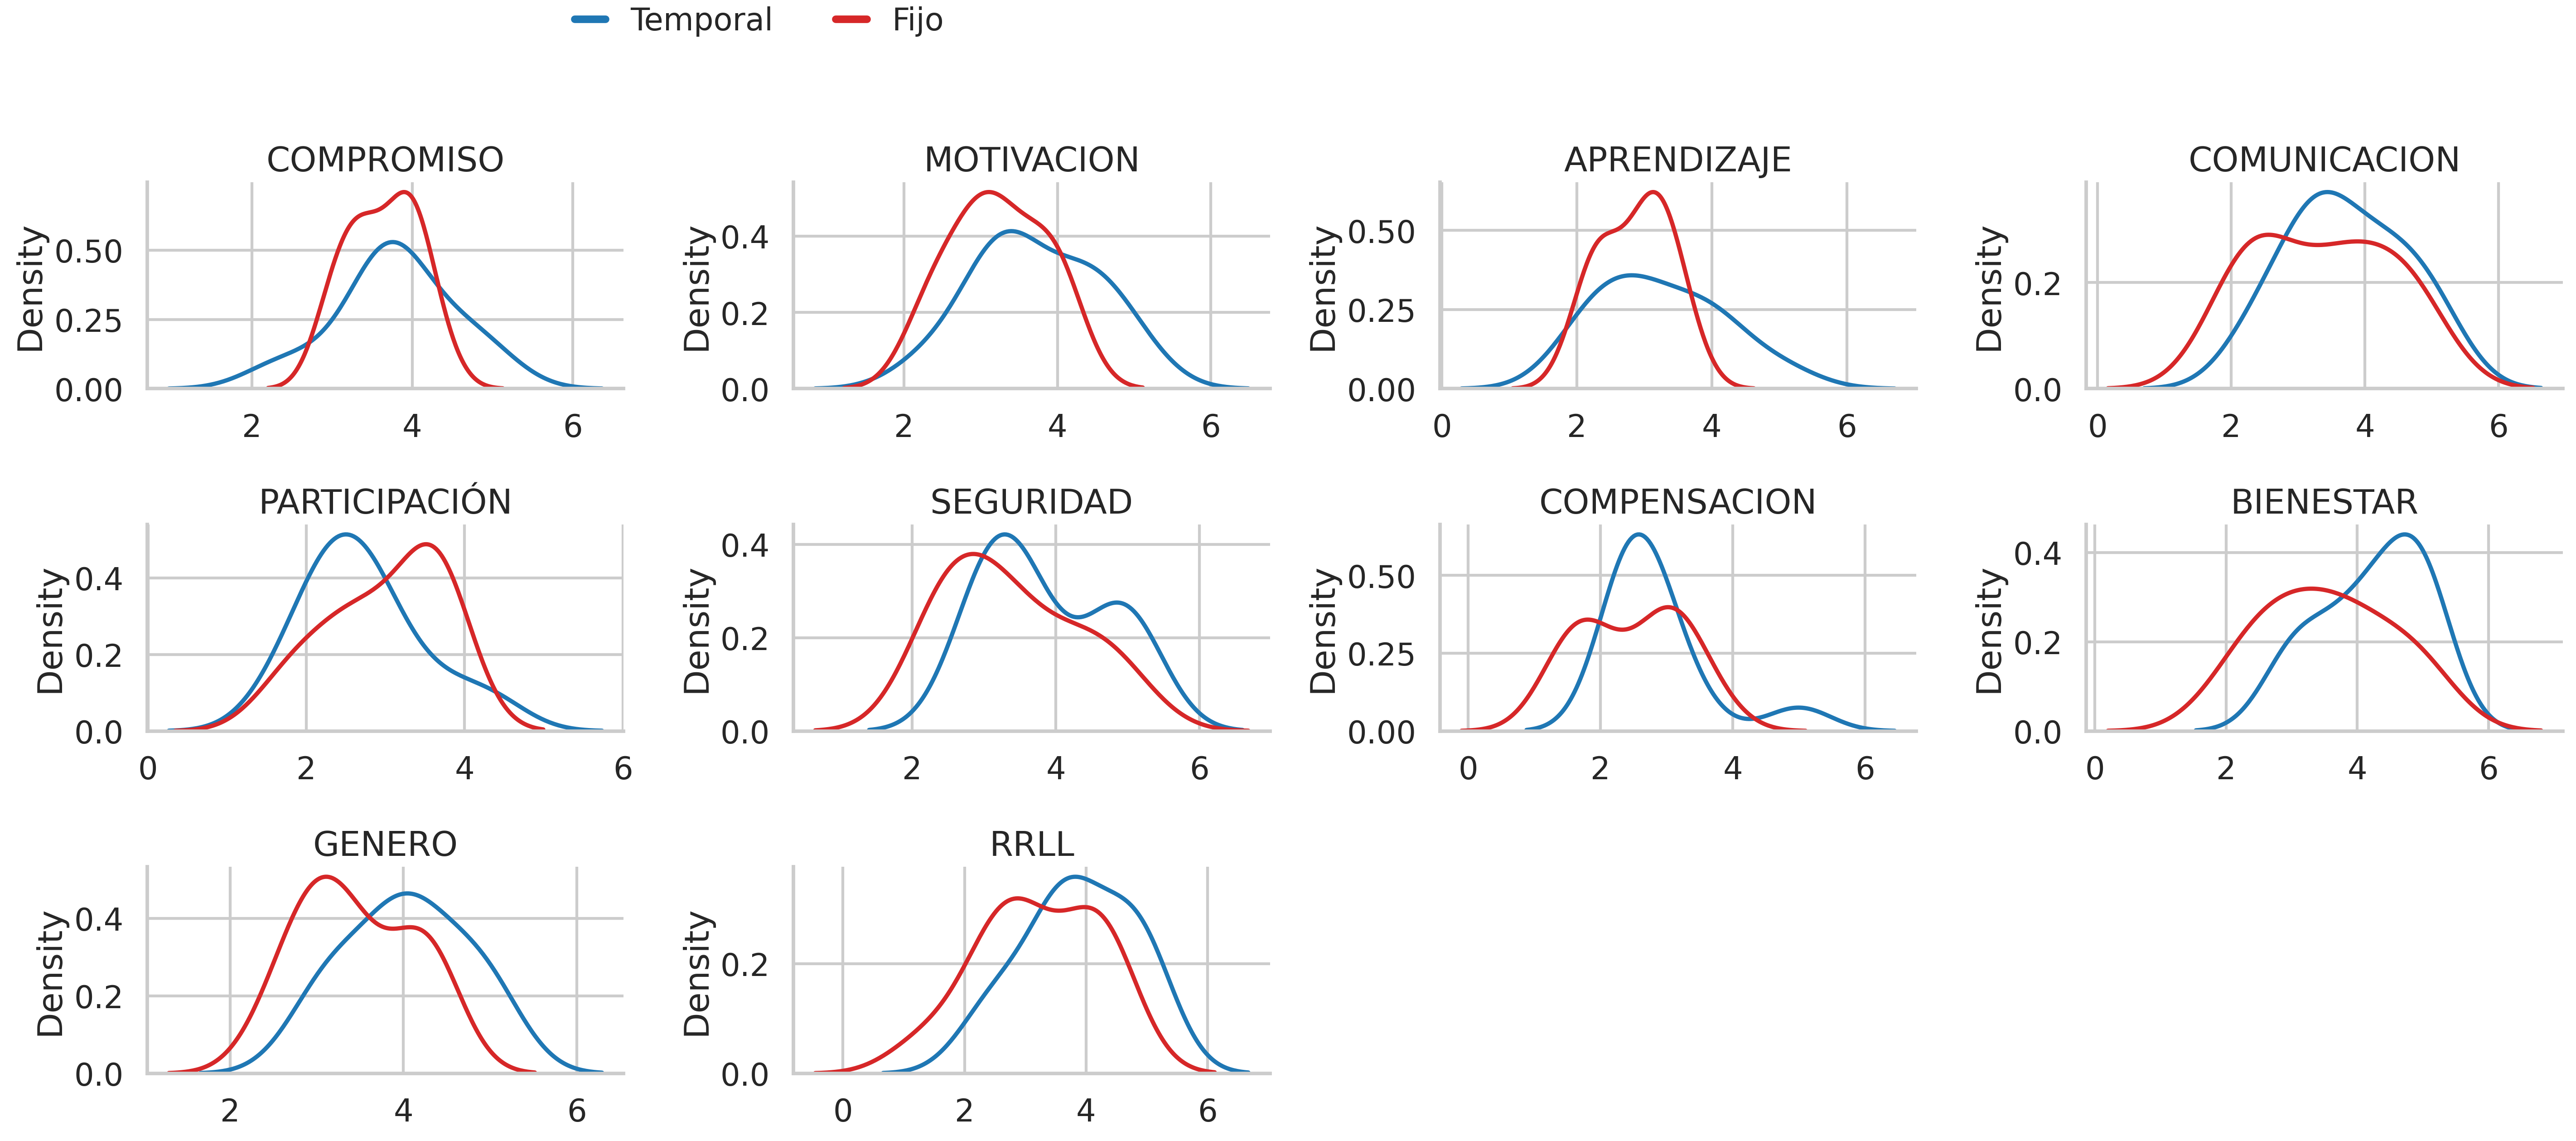

In [ ]:
from textwrap import fill

def make_pair(cat,  bboxy=1.1, ncol=4, bboxx=0.25, col_wrap=4, height=2.7, aspect=1.8):

  sns.set_theme(style="whitegrid")
  sns.set_context("talk")
  sns.set_palette(sns.color_palette(colors))

  data = pd.melt(df,id_vars=cat, value_vars=df.columns[4:])
  data.rename(columns={data.columns[1]: "variable", "value":"valor"}, inplace=True)
  data = data.drop(data[data[cat] == 'Otro'].index)

  #display(data)

  g = sns.FacetGrid(data, col=data.columns[1], hue=data.columns[0], col_wrap=col_wrap, sharex=False, sharey=False, aspect=aspect, height=height)
  g.map(sns.kdeplot, "valor")
  g.add_legend(loc='upper center',  ncol=ncol, bbox_to_anchor=(bboxx, bboxy), frameon=False,handlelength=1)
  for text in g.legend.get_texts():
    text.set_text(fill(text.get_text(), 20))
  for legobj in g.legend.get_lines():
    legobj.set_linewidth(4)

  g.set_xlabels("")
  g.fig.set_dpi(150)
  g.set_titles("{col_name}")

make_pair('SEXO')
make_pair('ANTIGÜEDAD')
make_pair('CONTRATO')
make_pair('DEPARTAMENTO')